In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


In [2]:
filepath = "../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv"
data_df = pd.read_csv(filepath)
data_df.head() #see first rows

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
data_df.dtypes # Here we see that name, host name, neighbour, roomtype, last review (date)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [4]:
# Defining column name whose values are string/object
stringData = list(data_df.dtypes[data_df.dtypes == "object"].index)
for col in stringData:
    data_df[col] = data_df[col].str.lower().str.replace(' ','_') #change each column data to lower with '_'
data_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,clean_&_quiet_apt_home_by_the_park,2787,john,brooklyn,kensington,40.64749,-73.97237,private_room,149,1,9,2018-10-19,0.21,6,365
1,2595,skylit_midtown_castle,2845,jennifer,manhattan,midtown,40.75362,-73.98377,entire_home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,the_village_of_harlem....new_york_!,4632,elisabeth,manhattan,harlem,40.80902,-73.94190,private_room,150,3,0,NaN,NaN,1,365
3,3831,cozy_entire_floor_of_brownstone,4869,lisaroxanne,brooklyn,clinton_hill,40.68514,-73.95976,entire_home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,entire_apt:_spacious_studio/loft_by_central_park,7192,laura,manhattan,east_harlem,40.79851,-73.94399,entire_home/apt,80,10,9,2018-11-19,0.10,1,0


## Exploratory Data Analysis

In [5]:
# We  get the number of different values for each column as well as the first 
# 5 (it's not a ranking, just as they appear)
for col in data_df.columns:
    print(col, data_df[col].nunique())
    #print(data_df[col].unique()[:5])
    #print(data_df[col].nunique())
# We see that neighbourhood group and room type belong to a group

id 48895
name 47486
host_id 37457
host_name 11428
neighbourhood_group 5
neighbourhood 221
latitude 19048
longitude 14718
room_type 3
price 674
minimum_nights 109
number_of_reviews 394
last_review 1764
reviews_per_month 937
calculated_host_listings_count 47
availability_365 366


Maximum is: 10000


<AxesSubplot:xlabel='price', ylabel='Count'>

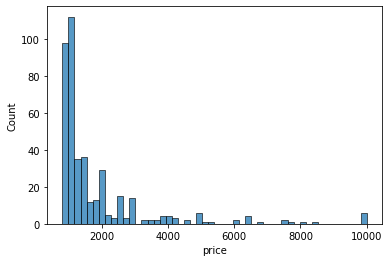

In [6]:
# Visualizing price distribution
import matplotlib.pyplot as plt
import seaborn as sns
#sns.histplot(data_df.price, bins=10)
# Better visualization using filtering and bins attribute
print("Maximum is:",data_df.price.max())
sns.histplot(data_df.price[data_df.price > 800], bins= 50)
#we can see that it has a long tail while the max price value is 10000

<AxesSubplot:xlabel='price', ylabel='Count'>

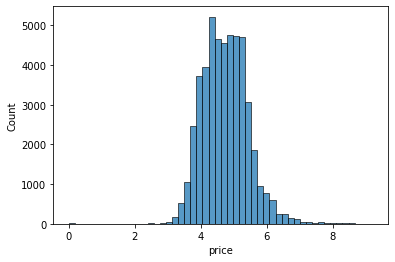

In [7]:
# Change the scale of hour values to ln(values + 1)
price_logs = np.log1p(data_df.price) # get a pandas series
#print(type(price_logs))
sns.histplot(price_logs, bins= 50)
# when we get the log1p of our price, we see a normal distribution

In [8]:
base = ['latitude','longitude','price','minimum_nights','number_of_reviews',
        'reviews_per_month','calculated_host_listings_count','availability_365']
print("# Rows and columns:",data_df.shape)
data_df_filtered = data_df[base]
data_df_filtered.isnull().sum()

# Rows and columns: (48895, 16)


latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
# Get statistical data
data_df['minimum_nights'].describe() #we see 50% percentile is 3.0

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

## Setting up the validation data

In [10]:
# Calculating the number of rows per data group
n = len(data_df_filtered)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

# shuffling the range of indexes
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [11]:
# Split the data
df_train = data_df_filtered.iloc[idx[:n_train]]
df_val = data_df_filtered.iloc[idx[n_train:n_train+n_val]]
df_test = data_df_filtered.iloc[idx[n_train+n_val:]]
len(df_train), len(df_val), len(df_test)

(29337, 9779, 9779)

In [12]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [13]:
y_train = np.log1p(df_train.price.values) # Our output is a numpy array
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

In [14]:
# we delete the price column after extracting our desired output
del df_train['price']
del df_val['price']
del df_test['price']

In [15]:
df_train.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64354,-73.97777,3,62,0.71,1,189
1,40.70666,-73.90779,21,0,NaN,1,73
2,40.76116,-73.99016,2,17,0.43,1,0
3,40.70763,-74.01050,2,5,1.88,327,272
4,40.79658,-73.93287,2,30,0.80,1,30


## Question : training with a fillna variation

In [16]:
# Defining linear regression training without regularization
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:] 

In [17]:
# Defining function to get root mean squared error
def rmse(y, y_pred):
    se = (y - y_pred)**2
    mse = se.mean()
    return np.sqrt(mse)

In [18]:
base_train = ['latitude','longitude','minimum_nights','number_of_reviews',
        'reviews_per_month','calculated_host_listings_count','availability_365']
def prepare_X(df,nFill): #This function is build to make it readable
    df = df.copy() # we make a copy to make functional programming with data and features
    features = base_train.copy()
    
    df_num = df[features]
    df_num = df_num.fillna(nFill)
    X = df_num.values
    return X

In [19]:
# training with values of 0 for fillna
X_train = prepare_X(df_train,0)
w0, w = train_linear_regression(X_train, y_train) #training oru model again

X_val = prepare_X(df_val,0)
y_pred = w0 + X_val.dot(w)
rmse_fill0 =round(rmse(y_val, y_pred),2)
print(rmse_fill0)

0.64


In [20]:
# training with values of mean for fillna
mean_reviews = df_train['reviews_per_month'].mean()

X_train = prepare_X(df_train,mean_reviews)
w0, w = train_linear_regression(X_train, y_train) #training oru model again

X_val = prepare_X(df_val,mean_reviews)
y_pred = w0 + X_val.dot(w)
rmse_fillmean = round(rmse(y_val, y_pred),2)
print(rmse_fillmean)

0.64


## Question 4 : regularization

In [21]:
# we define our new regression training
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [22]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X(df_train,0)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val,0)
    y_pred = w0 + X_val.dot(w)
    score =rmse(y_val, y_pred)
    
    print(r,"gives a rmse:", score)

0 gives a rmse: 0.6430337788500516
1e-06 gives a rmse: 0.6430341157454865
0.0001 gives a rmse: 0.6430723153526027
0.001 gives a rmse: 0.6437669735263444
0.01 gives a rmse: 0.6557528427439105
0.1 gives a rmse: 0.6773299642451833
1 gives a rmse: 0.6823116950157312
5 gives a rmse: 0.6827915727840732
10 gives a rmse: 0.6828430212097046


## Question 5: trying different values for the seed

In [23]:
rmse_array = []
# shuffling the range of indexes
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = data_df_filtered.iloc[idx[:n_train]]
    df_val = data_df_filtered.iloc[idx[n_train:n_train+n_val]]

    df_train = df_train.reset_index(drop = True)
    df_val = df_val.reset_index(drop = True)

    y_train = np.log1p(df_train.price.values) # Our output is a numpy array
    y_val = np.log1p(df_val.price.values)

    del df_train['price']
    del df_val['price']
    
    X_train = prepare_X(df_train,0)
    w0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val,0)
    y_pred = w0 + X_val.dot(w)
    score =rmse(y_val, y_pred)
    rmse_array.append(score)
    print(seed,"gives a rmse:", score)
stdSeed = np.std(rmse_array)
print(round(stdSeed,3))

0 gives a rmse: 0.6549779960887462
1 gives a rmse: 0.6462523685757932
2 gives a rmse: 0.6476558177137809
3 gives a rmse: 0.6375145070348596
4 gives a rmse: 0.6445809083518486
5 gives a rmse: 0.6305809996967069
6 gives a rmse: 0.6297851918260075
7 gives a rmse: 0.6506184266465503
8 gives a rmse: 0.6489780353303394
9 gives a rmse: 0.6437565168390085
0.008


In [24]:
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_train = data_df_filtered.iloc[idx[:n_train]]
df_val = data_df_filtered.iloc[idx[n_train:n_train+n_val]]
df_test = data_df_filtered.iloc[idx[n_train+n_val:]]

df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

y_train = np.log1p(df_train.price.values) # Our output is a numpy array
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

y_full_train = np.concatenate([y_train, y_val])

del df_train['price']
del df_val['price']
del df_test['price']
    
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

X_full_train = prepare_X(df_full_train,0)
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r = 0.001)

X_test = prepare_X(df_test, 0)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)

print(round(score,2))

0.65
